# Wk18-Lecture01-CodeAlong: Preparing Time Series Data

## Learning Objectives

- By the end of this CodeAlong, students will be able to:
    - Create date time indices
    - Resample at various frequencies
    - Impute null values for time series 
    - Convert wide-form data to long-form
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

# Working with Time Series - Data with Regular Intervals

### Stock Data (S&P500)

- S&P 500 (Kibot) 
     - IVE S&P 500 1-min aggregate data from: http://www.kibot.com/free_historical_data.aspx

In [3]:
sp500_min_df = pd.read_csv('Data/stocks/sp500_ive_min_tick_bidask.csv')
sp500_min_df.head()

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
0,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67
1,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53
2,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55
3,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59
4,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52


In [4]:
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      445762 non-null  object 
 1   Time      445762 non-null  object 
 2   BidOpen   445762 non-null  float64
 3   BidHigh   445762 non-null  float64
 4   BidLow    445762 non-null  float64
 5   BidClose  445762 non-null  float64
 6   AskOpen   445762 non-null  float64
 7   AskHigh   445762 non-null  float64
 8   AskLow    445762 non-null  float64
 9   AskClose  445762 non-null  float64
dtypes: float64(8), object(2)
memory usage: 34.0+ MB


## <font color='blue'> Step 1: </font>Convert dates and times into a single column

Combine date and time columns

In [6]:
%%time

## Combine 'Date' and 'Time' columns
sp500_min_df['datetime'] = sp500_min_df['Date'] + ' ' + sp500_min_df['Time']
sp500_min_df.head()

## Drop 'Date' and 'Time' columns
sp500_min_df = sp500_min_df.drop(columns=['Date','Time'])
sp500_min_df.head()

CPU times: total: 46.9 ms
Wall time: 91 ms


,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,datetime
0,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67,01/02/2018 09:29
1,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53,01/02/2018 09:30
2,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55,01/02/2018 09:31
3,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59,01/02/2018 09:32
4,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52,01/02/2018 09:33


## <font color='blue'> Step 2: </font> Convert Datetime column to <font color='green'> datetime </font> type with <font color='green'> pd.to_datetime </font>

## Using pd.to_datetime (without strftime format codes)

In [7]:
%%time
## Make a datetime index using pd.to_datetime
sp500_min_df['temp_datetime'] = pd.to_datetime(sp500_min_df['datetime'])
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   BidOpen        445762 non-null  float64       
 1   BidHigh        445762 non-null  float64       
 2   BidLow         445762 non-null  float64       
 3   BidClose       445762 non-null  float64       
 4   AskOpen        445762 non-null  float64       
 5   AskHigh        445762 non-null  float64       
 6   AskLow         445762 non-null  float64       
 7   AskClose       445762 non-null  float64       
 8   datetime       445762 non-null  object        
 9   temp_datetime  445762 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 34.0+ MB
CPU times: total: 32.8 s
Wall time: 39.6 s


- We can speed up the conversion by specifying the correct time format and setting `infer_datetime_format=False`

## Using pd.to_datetime with strftime codes!

- Datetime objects have a `.strftime()` method (string-format-time)

- 📖 **strftime cheat sheet: https://strftime.org/**
- 📖 **Official Table of Python datetime format codes: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes **


| Directive   | Meaning                                                                                                                                                                          | Example                                                                      |
|:------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------|
| %a          | Weekday as locale’s abbreviated name.                                                                                                                                            | Sun, Mon, …, Sat (en_US); So, Mo, …, Sa (de_DE)                              |
| %A          | Weekday as locale’s full name.                                                                                                                                                   | Sunday, Monday, …, Saturday (en_US); Sonntag, Montag, …, Samstag (de_DE)     |
| %w          | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.                                                                                                                | 0, 1, …, 6                                                                   |
| %d          | Day of the month as a zero-padded decimal number.                                                                                                                                | 01, 02, …, 31                                                                |
| %b          | Month as locale’s abbreviated name.                                                                                                                                              | Jan, Feb, …, Dec (en_US); Jan, Feb, …, Dez (de_DE)                           |
| %B          | Month as locale’s full name.                                                                                                                                                     | January, February, …, December (en_US); Januar, Februar, …, Dezember (de_DE) |
| %m          | Month as a zero-padded decimal number.                                                                                                                                           | 01, 02, …, 12                                                                |
| %y          | Year without century as a zero-padded decimal number.                                                                                                                            | 00, 01, …, 99                                                                |
| %Y          | Year with century as a decimal number.                                                                                                                                           | 0001, 0002, …, 2013, 2014, …, 9998, 9999                                     |
| %H          | Hour (24-hour clock) as a zero-padded decimal number.                                                                                                                            | 00, 01, …, 23                                                                |
| %I          | Hour (12-hour clock) as a zero-padded decimal number.                                                                                                                            | 01, 02, …, 12                                                                |
| %p          | Locale’s equivalent of either AM or PM.                                                                                                                                          | AM, PM (en_US); am, pm (de_DE)                                               |
| %M          | Minute as a zero-padded decimal number.                                                                                                                                          | 00, 01, …, 59                                                                |
| %S          | Second as a zero-padded decimal number.                                                                                                                                          | 00, 01, …, 59                                                                |
| %f          | Microsecond as a decimal number, zero-padded to 6 digits.                                                                                                                        | 000000, 000001, …, 999999                                                    |
| %z          | UTC offset in the form ±HHMM[SS[.ffffff]] (empty string if the object is naive).                                                                                                 | (empty), +0000, -0400, +1030, +063415, -030712.345216                        |
| %Z          | Time zone name (empty string if the object is naive).                                                                                                                            | (empty), UTC, GMT                                                            |
| %j          | Day of the year as a zero-padded decimal number.                                                                                                                                 | 001, 002, …, 366                                                             |
| %U          | Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number. All days in a new year preceding the first Sunday are considered to be in week 0. | 00, 01, …, 53                                                                |
| %W          | Week number of the year (Monday as the first day of the week) as a zero-padded decimal number. All days in a new year preceding the first Monday are considered to be in week 0. | 00, 01, …, 53                                                                |
| %c          | Locale’s appropriate date and time representation.                                                                                                                               | Tue Aug 16 21:30:00 1988 (en_US); Di 16 Aug 21:30:00 1988 (de_DE)            |
| %x          | Locale’s appropriate date representation.                                                                                                                                        | 08/16/88 (None); 08/16/1988 (en_US); 16.08.1988 (de_DE)                      |
| %X          | Locale’s appropriate time representation.                                                                                                                                        | 21:30:00 (en_US); 21:30:00 (de_DE)                                           |
| %%          | A literal '%' character.                                                                                                                                                         | %                                                                            |

In [11]:
## Creating/testing our time format
import datetime
today_datetime = datetime.datetime.today()

fmt = "%m/%d/%Y %H:%M"

## Test Format
today_datetime.strftime(fmt)

'09/26/2023 17:50'

In [8]:
## Compare to dates in dataframe
sp500_min_df['datetime'][0]

'01/02/2018 09:29'

In [13]:
%%time
## Make a datetime index using pd.to_datetime & specifying the format  (to save gtime)
sp500_min_df['datetime'] = pd.to_datetime(sp500_min_df['datetime'], format=fmt)
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   BidOpen        445762 non-null  float64       
 1   BidHigh        445762 non-null  float64       
 2   BidLow         445762 non-null  float64       
 3   BidClose       445762 non-null  float64       
 4   AskOpen        445762 non-null  float64       
 5   AskHigh        445762 non-null  float64       
 6   AskLow         445762 non-null  float64       
 7   AskClose       445762 non-null  float64       
 8   datetime       445762 non-null  datetime64[ns]
 9   temp_datetime  445762 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(8)
memory usage: 34.0 MB
CPU times: total: 1.02 s
Wall time: 1.29 s


In [14]:
sp500_min_df = sp500_min_df.drop(columns=['temp_datetime'])
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   BidOpen   445762 non-null  float64       
 1   BidHigh   445762 non-null  float64       
 2   BidLow    445762 non-null  float64       
 3   BidClose  445762 non-null  float64       
 4   AskOpen   445762 non-null  float64       
 5   AskHigh   445762 non-null  float64       
 6   AskLow    445762 non-null  float64       
 7   AskClose  445762 non-null  float64       
 8   datetime  445762 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 30.6 MB


In [15]:
sp500_min_df.head()

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,datetime
0,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67,2018-01-02 09:29:00
1,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53,2018-01-02 09:30:00
2,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55,2018-01-02 09:31:00
3,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59,2018-01-02 09:32:00
4,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52,2018-01-02 09:33:00


## <font color='blue'> Step 3: </font> Set Datetime as Index

In [16]:
## Setting the datetime index
sp500_min_df = sp500_min_df.set_index('datetime')
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 445762 entries, 2018-01-02 09:29:00 to 2023-01-27 16:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   BidOpen   445762 non-null  float64
 1   BidHigh   445762 non-null  float64
 2   BidLow    445762 non-null  float64
 3   BidClose  445762 non-null  float64
 4   AskOpen   445762 non-null  float64
 5   AskHigh   445762 non-null  float64
 6   AskLow    445762 non-null  float64
 7   AskClose  445762 non-null  float64
dtypes: float64(8)
memory usage: 30.6 MB


In [17]:
# check the index to confirm its datetime
sp500_min_df.index


DatetimeIndex(['2018-01-02 09:29:00', '2018-01-02 09:30:00',
               '2018-01-02 09:31:00', '2018-01-02 09:32:00',
               '2018-01-02 09:33:00', '2018-01-02 09:34:00',
               '2018-01-02 09:35:00', '2018-01-02 09:36:00',
               '2018-01-02 09:37:00', '2018-01-02 09:38:00',
               ...
               '2023-01-27 15:51:00', '2023-01-27 15:52:00',
               '2023-01-27 15:53:00', '2023-01-27 15:54:00',
               '2023-01-27 15:55:00', '2023-01-27 15:56:00',
               '2023-01-27 15:57:00', '2023-01-27 15:58:00',
               '2023-01-27 15:59:00', '2023-01-27 16:00:00'],
              dtype='datetime64[ns]', name='datetime', length=445762, freq=None)

🧠 Why is it useful to have the year first, month second, and day third?

### Keep only the closing prices

In [20]:
# Only keeping Closing Ask/Bid
close_cols = [c for c in sp500_min_df.columns if 'Close' in c]
df_ts = sp500_min_df[close_cols]
df_ts.head()

,BidClose,AskClose
datetime,,
2018-01-02 09:29:00,102.33,102.67
2018-01-02 09:30:00,102.52,102.53
2018-01-02 09:31:00,102.53,102.55
2018-01-02 09:32:00,102.58,102.59
2018-01-02 09:33:00,102.51,102.52


## 📈 Visualizing Our Time Series DataFrame

<Axes: xlabel='datetime'>

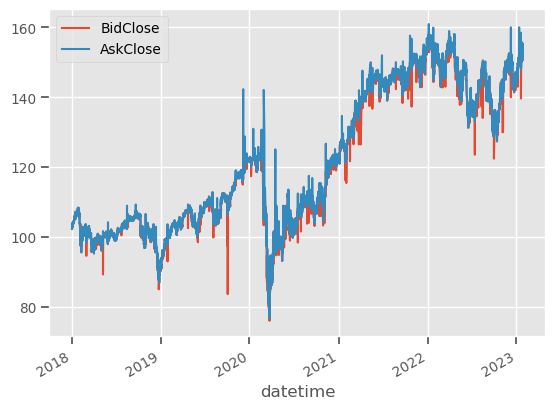

In [21]:
## let's visualize our dataframe 
df_ts.plot()


> Time series visualizations usually require wider figures. 

### Changing Default Figure Size

In [22]:
# check default figsize in rcParams
plt.rcParams['figure.figsize']


[6.4, 4.8]

In [23]:
## Change the default figure size to something wider (12,5)
plt.rcParams['figure.figsize'] = (12,5)


<Axes: xlabel='datetime'>

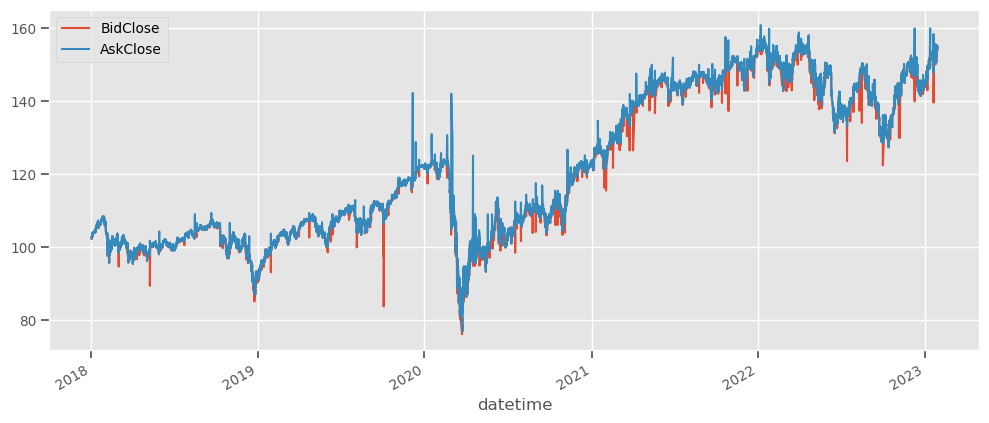

In [24]:
## recreate the plot
df_ts.plot()


## Datetime Index Superpowers: Slicing !

In [25]:
## Get all/any dates from 2022
df_ts.loc['2022']


,BidClose,AskClose
datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-12-30 15:56:00,144.98,145.00
2022-12-30 15:57:00,144.99,145.00
2022-12-30 15:58:00,145.02,145.03


In [28]:
# Get all of january, 2022
df_ts.loc['1/2022']


,BidClose,AskClose
datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-01-31 15:56:00,151.69,151.72
2022-01-31 15:57:00,151.74,151.77
2022-01-31 15:58:00,151.68,151.71


In [32]:
## Get January 01st, 2022 to March 16th 2022
df_ts.loc['1/1/2022':'mar 16th 2022 12:22']


,BidClose,AskClose
datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-03-16 12:18:00,149.61,149.63
2022-03-16 12:19:00,149.59,149.61
2022-03-16 12:20:00,149.59,149.61


In [33]:
## Keep Jan. 1st, 2022, to March 16th, 2022
ts = df_ts.loc['1/1/2022':'3/16/2022']
ts


,BidClose,AskClose
datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-03-16 15:56:00,149.80,149.83
2022-03-16 15:57:00,149.76,149.78
2022-03-16 15:58:00,149.84,149.85


> Notice the earliest date is 2020-01-03

In [34]:
## Get just 01/03 - AskClose
ts.loc['1/03/2022', 'AskClose']


datetime
2022-01-03 09:30:00   154.53
2022-01-03 09:31:00   154.44
2022-01-03 09:32:00   154.39
2022-01-03 09:33:00   154.55
2022-01-03 09:34:00   154.60
                       ...  
2022-01-03 15:56:00   154.86
2022-01-03 15:57:00   154.90
2022-01-03 15:58:00   154.86
2022-01-03 15:59:00   155.00
2022-01-03 16:00:00   155.02
Name: AskClose, Length: 352, dtype: float64

In [35]:
## saving new TS just for 2020, and just AskClose column
ts = ts.loc['2022', 'AskClose']
ts

datetime
2022-01-03 09:30:00   154.53
2022-01-03 09:31:00   154.44
2022-01-03 09:32:00   154.39
2022-01-03 09:33:00   154.55
2022-01-03 09:34:00   154.60
                       ...  
2022-03-16 15:56:00   149.83
2022-03-16 15:57:00   149.78
2022-03-16 15:58:00   149.85
2022-03-16 15:59:00   150.04
2022-03-16 16:00:00   150.09
Name: AskClose, Length: 19083, dtype: float64

<Axes: xlabel='datetime'>

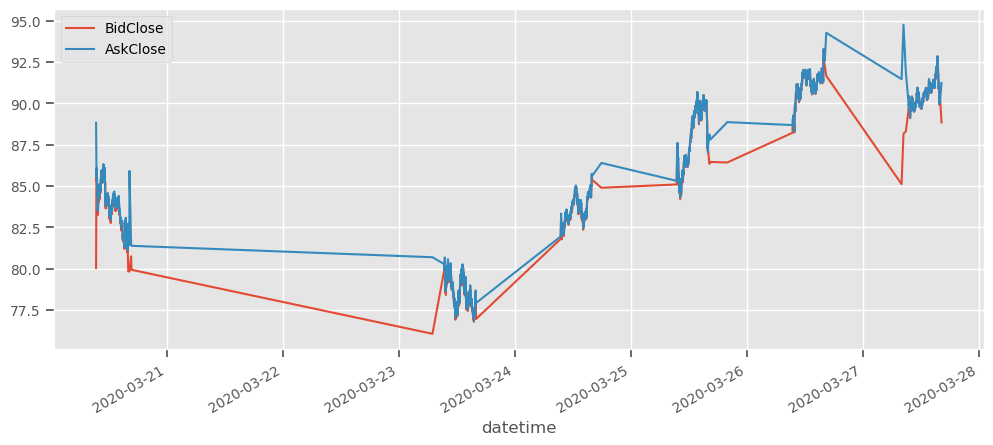

In [37]:
## Slicing out one week in March 2020, 3/20 to 3/28
temp_ts = df_ts.loc['3/20/2020':'3/28/2020']
temp_ts.plot()

In [38]:
## Plot the week

temp_ts.loc['3/22/2020']

,BidClose,AskClose
datetime,,


#### 🧠 Why are there gaps in the data above?

In [ ]:
## Check values for missing day


In [ ]:
## There are no null values in the ts var...



> What day of the week were the days missing data?

In [ ]:
## what days of the week were the days missing data?



## <font color='blue'> Step 4: </font>Resampling to Desired Frequency

### Pandas Frequency Codes

![pandas frequency codes](pandas_freq_cheatsheet.png)

In [40]:
# what is our datetime index's frequency?
temp_ts.index


DatetimeIndex(['2020-03-20 09:26:00', '2020-03-20 09:30:00',
               '2020-03-20 09:31:00', '2020-03-20 09:32:00',
               '2020-03-20 09:33:00', '2020-03-20 09:34:00',
               '2020-03-20 09:35:00', '2020-03-20 09:36:00',
               '2020-03-20 09:37:00', '2020-03-20 09:38:00',
               ...
               '2020-03-27 15:52:00', '2020-03-27 15:53:00',
               '2020-03-27 15:54:00', '2020-03-27 15:55:00',
               '2020-03-27 15:56:00', '2020-03-27 15:57:00',
               '2020-03-27 15:58:00', '2020-03-27 15:59:00',
               '2020-03-27 16:00:00', '2020-03-27 16:17:00'],
              dtype='datetime64[ns]', name='datetime', length=2360, freq=None)

In [41]:
# Resample as last value of each minute
eda_ts = temp_ts.resample('min').last()
## Check sample of values

## Check index
eda_ts.index

DatetimeIndex(['2020-03-20 09:26:00', '2020-03-20 09:27:00',
               '2020-03-20 09:28:00', '2020-03-20 09:29:00',
               '2020-03-20 09:30:00', '2020-03-20 09:31:00',
               '2020-03-20 09:32:00', '2020-03-20 09:33:00',
               '2020-03-20 09:34:00', '2020-03-20 09:35:00',
               ...
               '2020-03-27 16:08:00', '2020-03-27 16:09:00',
               '2020-03-27 16:10:00', '2020-03-27 16:11:00',
               '2020-03-27 16:12:00', '2020-03-27 16:13:00',
               '2020-03-27 16:14:00', '2020-03-27 16:15:00',
               '2020-03-27 16:16:00', '2020-03-27 16:17:00'],
              dtype='datetime64[ns]', name='datetime', length=10492, freq='T')

In [42]:
## What is the orginal shape?
temp_ts.shape



(2360, 2)

In [43]:
## What is the original NaN count?
eda_ts.shape



(10492, 2)

In [44]:
eda_ts.loc['3/22/2020']

,BidClose,AskClose
datetime,,
2020-03-22 00:00:00,NaN,NaN
2020-03-22 00:01:00,NaN,NaN
2020-03-22 00:02:00,NaN,NaN
2020-03-22 00:03:00,NaN,NaN
2020-03-22 00:04:00,NaN,NaN
...,...,...
2020-03-22 23:55:00,NaN,NaN
2020-03-22 23:56:00,NaN,NaN
2020-03-22 23:57:00,NaN,NaN


In [ ]:
## What is the new resampled shape?




In [45]:
## How many NaNs in the resampled data?

eda_ts.isna().sum()


BidClose    8132
AskClose    8132
dtype: int64

<Axes: xlabel='datetime'>

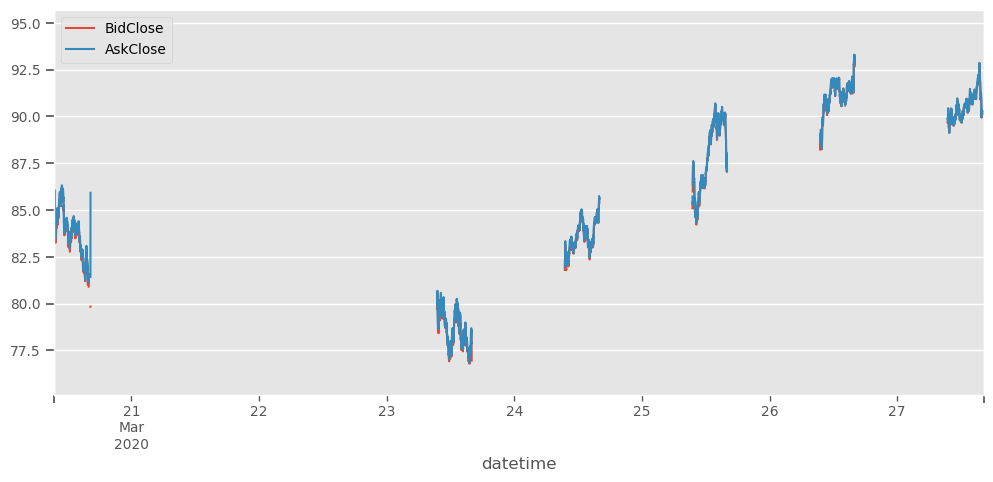

In [46]:
# Plot resampled data

eda_ts.plot()

## <font color='blue'> Step 5: </font>Imputing Null Values (time series style!)

In [48]:
ts_min = eda_ts.copy()

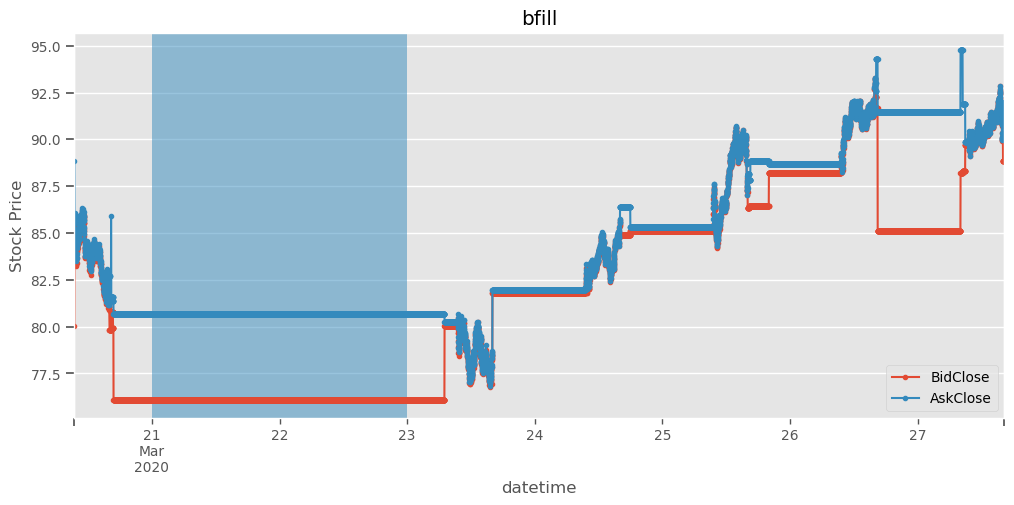

In [49]:
# Fill with back fill
ts_bfill = ts_min.fillna(method='bfill')

#plot backfilled data
ax = ts_bfill.plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='bfill', ylabel="Stock Price");

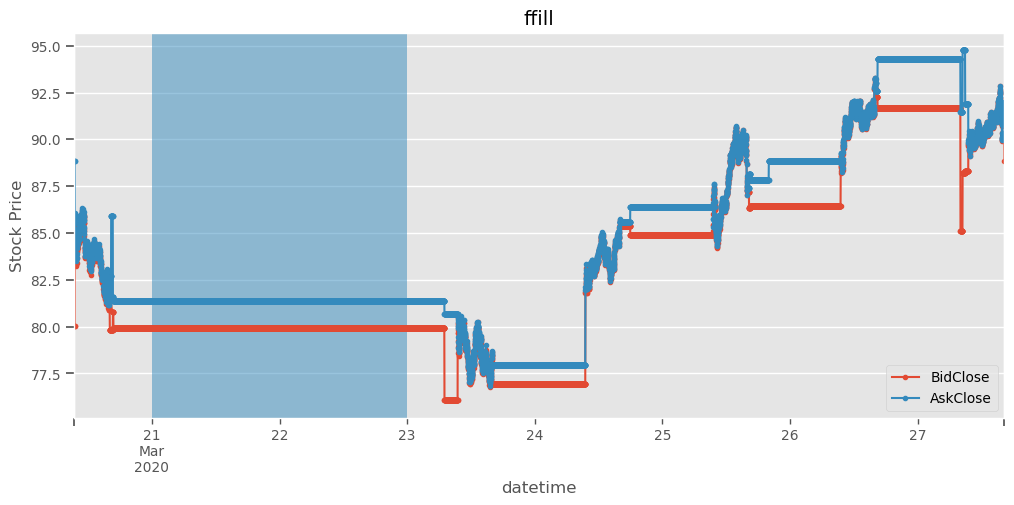

In [50]:
# Fill with forward fill
ts_ffill = ts_min.fillna(method='ffill')

#plot forward data
ax = ts_ffill.plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='ffill', ylabel="Stock Price");

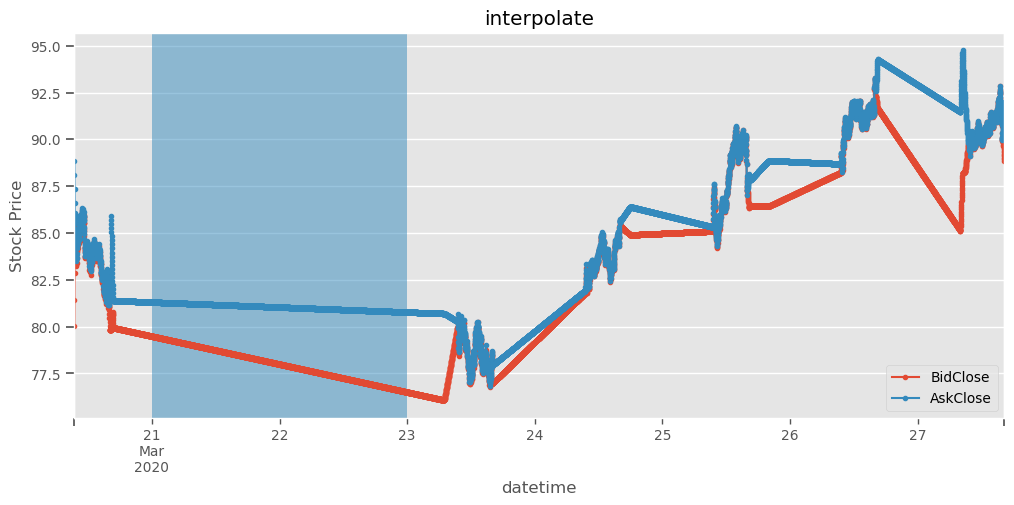

In [51]:
# Interpolate missing data
ts_interpolate = ts_min.interpolate()

# Plot interpolated data
ax = ts_interpolate.plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='interpolate', ylabel="Stock Price");

# Working with Wide-Form Time Series Data

## <font color='blue'> Step 1 </font>: Convert datetime to One Column

In [53]:
crypto = pd.read_csv("Data/stocks/wide-form-crypto.csv")
crypto

,CryptoCurrency,Symbol,Currency,2014-09-17,2014-09-18,2014-09-19,2014-09-20,2014-09-21,2014-09-22,2014-09-23,...,2023-01-17,2023-01-18,2023-01-19,2023-01-20,2023-01-21,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26
0,Bitcoin,BTC-USD,BTC,457.33,424.44,394.80,408.90,398.82,402.15,435.79,...,"21,161.52","20,688.78","21,086.79","22,676.55","22,777.62","22,720.42","22,934.43","22,636.47","23,117.86","23,032.78"
1,Etherium,ETH-USD,ETH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,567.85","1,515.51","1,552.56","1,659.75","1,627.12","1,628.38","1,628.25","1,556.60","1,611.71","1,603.11"
2,Dogecoin,DOGE-USD,DOGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.08,0.08,0.08,0.09,0.08,0.09,0.09,0.08,0.09,0.09


In [54]:
## What are the ID columns?
id_vars = crypto.columns[:3]
id_vars

Index(['CryptoCurrency', 'Symbol', 'Currency'], dtype='object')

In [56]:
## Melt the crypto data 
long_crypto = pd.melt(crypto, id_vars=id_vars, var_name='Date', value_name='Price')
long_crypto

,CryptoCurrency,Symbol,Currency,Date,Price
0,Bitcoin,BTC-USD,BTC,2014-09-17,457.33
1,Etherium,ETH-USD,ETH,2014-09-17,NaN
2,Dogecoin,DOGE-USD,DOGE,2014-09-17,NaN
3,Bitcoin,BTC-USD,BTC,2014-09-18,424.44
4,Etherium,ETH-USD,ETH,2014-09-18,NaN
...,...,...,...,...,...
9157,Etherium,ETH-USD,ETH,2023-01-25,"1,611.71"
9158,Dogecoin,DOGE-USD,DOGE,2023-01-25,0.09
9159,Bitcoin,BTC-USD,BTC,2023-01-26,"23,032.78"
9160,Etherium,ETH-USD,ETH,2023-01-26,"1,603.11"


## <font color='blue'> Step 2: </font> Converting datetime Column to datetime Type

In [57]:
## Now make Date column datetime 
long_crypto['Date'] = pd.to_datetime(long_crypto['Date'], format="%Y-%m-%d")
long_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9162 entries, 0 to 9161
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CryptoCurrency  9162 non-null   object        
 1   Symbol          9162 non-null   object        
 2   Currency        9162 non-null   object        
 3   Date            9162 non-null   datetime64[ns]
 4   Price           6864 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 358.0+ KB


## <font color='blue'> Step 3: </font> Set datetime as Index

In [58]:
## Set Date as index
long_crypto = long_crypto.set_index('Date')
long_crypto.index

DatetimeIndex(['2014-09-17', '2014-09-17', '2014-09-17', '2014-09-18',
               '2014-09-18', '2014-09-18', '2014-09-19', '2014-09-19',
               '2014-09-19', '2014-09-20',
               ...
               '2023-01-23', '2023-01-24', '2023-01-24', '2023-01-24',
               '2023-01-25', '2023-01-25', '2023-01-25', '2023-01-26',
               '2023-01-26', '2023-01-26'],
              dtype='datetime64[ns]', name='Date', length=9162, freq=None)

In [ ]:
## Check index for frequency



## <font color='blue'> Step 4: </font> Resample to Desired Frequency

In [62]:
# group by currency and resample as daily. Keep only 'Value' column
crypto_ts = long_crypto.groupby('CryptoCurrency').resample('D').last()['Price']
crypto_ts

CryptoCurrency  Date      
Bitcoin         2014-09-17     457.33
                2014-09-18     424.44
                2014-09-19     394.80
                2014-09-20     408.90
                2014-09-21     398.82
                               ...   
Etherium        2023-01-22   1,628.38
                2023-01-23   1,628.25
                2023-01-24   1,556.60
                2023-01-25   1,611.71
                2023-01-26   1,603.11
Name: Price, Length: 9162, dtype: float64

In [64]:
type(crypto_ts)

pandas.core.series.Series

In [63]:
crypto_ts.index

MultiIndex([( 'Bitcoin', '2014-09-17'),
            ( 'Bitcoin', '2014-09-18'),
            ( 'Bitcoin', '2014-09-19'),
            ( 'Bitcoin', '2014-09-20'),
            ( 'Bitcoin', '2014-09-21'),
            ( 'Bitcoin', '2014-09-22'),
            ( 'Bitcoin', '2014-09-23'),
            ( 'Bitcoin', '2014-09-24'),
            ( 'Bitcoin', '2014-09-25'),
            ( 'Bitcoin', '2014-09-26'),
            ...
            ('Etherium', '2023-01-17'),
            ('Etherium', '2023-01-18'),
            ('Etherium', '2023-01-19'),
            ('Etherium', '2023-01-20'),
            ('Etherium', '2023-01-21'),
            ('Etherium', '2023-01-22'),
            ('Etherium', '2023-01-23'),
            ('Etherium', '2023-01-24'),
            ('Etherium', '2023-01-25'),
            ('Etherium', '2023-01-26')],
           names=['CryptoCurrency', 'Date'], length=9162)

<Axes: xlabel='CryptoCurrency,Date'>

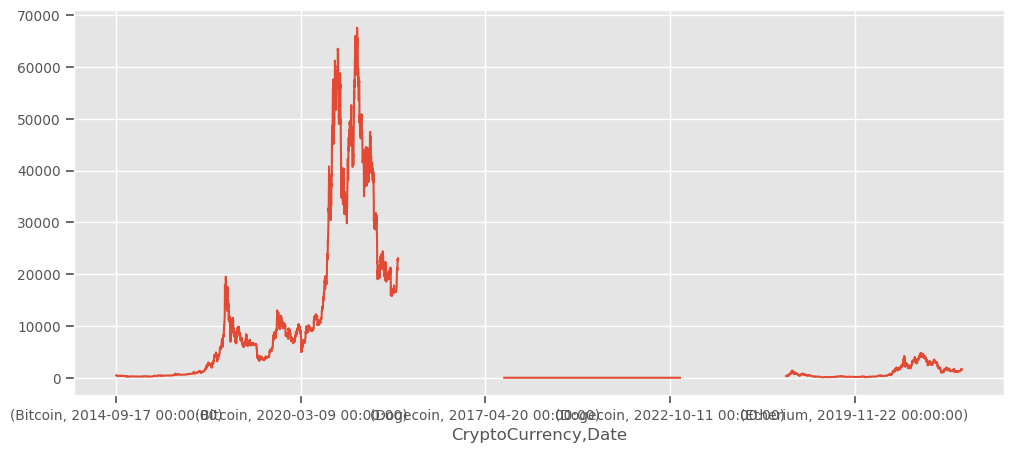

In [65]:
## Plot resampled data
crypto_ts.plot()


> What are we seeing?

In [ ]:
## Inspect resampled data



In [69]:
## Unstack grouped data

crypto_unstacked = crypto_ts.unstack(0)
crypto_unstacked

CryptoCurrency,Bitcoin,Dogecoin,Etherium
Date,,,
2014-09-17,457.33,NaN,NaN
2014-09-18,424.44,NaN,NaN
2014-09-19,394.80,NaN,NaN
2014-09-20,408.90,NaN,NaN
2014-09-21,398.82,NaN,NaN
...,...,...,...
2023-01-22,"22,720.42",0.09,"1,628.38"
2023-01-23,"22,934.43",0.09,"1,628.25"
2023-01-24,"22,636.47",0.08,"1,556.60"


<Axes: xlabel='Date'>

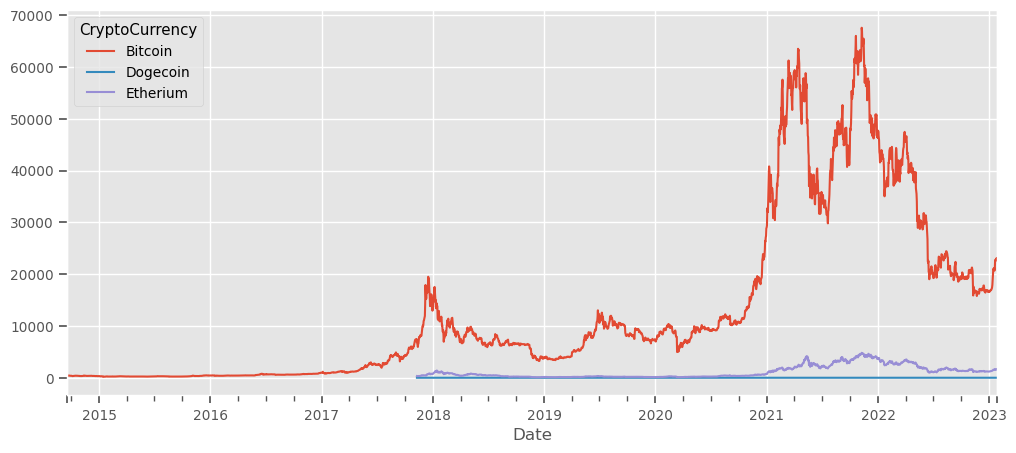

In [70]:
## Plot unstacked data
crypto_unstacked.plot()


## Selecting our TS for Resampling Demonstration

In [74]:
## Keep just bitcoin data from 2021 to 2022
ts = crypto_unstacked.loc['2021':'2022']['Bitcoin']
ts

Date
2021-01-01   29,374.15
2021-01-02   32,127.27
2021-01-03   32,782.02
2021-01-04   31,971.91
2021-01-05   33,992.43
                ...   
2022-12-27   16,717.17
2022-12-28   16,552.57
2022-12-29   16,642.34
2022-12-30   16,602.59
2022-12-31   16,547.50
Freq: D, Name: Bitcoin, Length: 730, dtype: float64

In [ ]:
## Plot 2021-2022 bitcoin data



## Resampling

In [ ]:
## Check the index to confirm the current freq



>It looks like we have minute-resolution data (frequency = minutes).

### Resample as Weeks Frequency

- We need to look up the correct frequency code for weeks: https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects 
    

In [ ]:
## Resample to weeks using correct freq code and keep just the last value
ts_W = ##
ts_W

In [ ]:
ts_W.index

### Let's resample and plot our ts as daily, weekly, and monthly to compare.

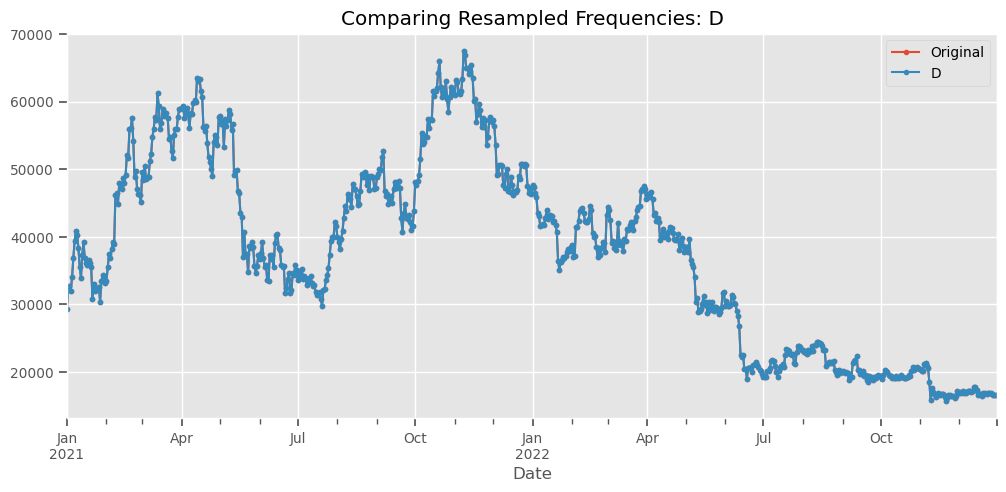

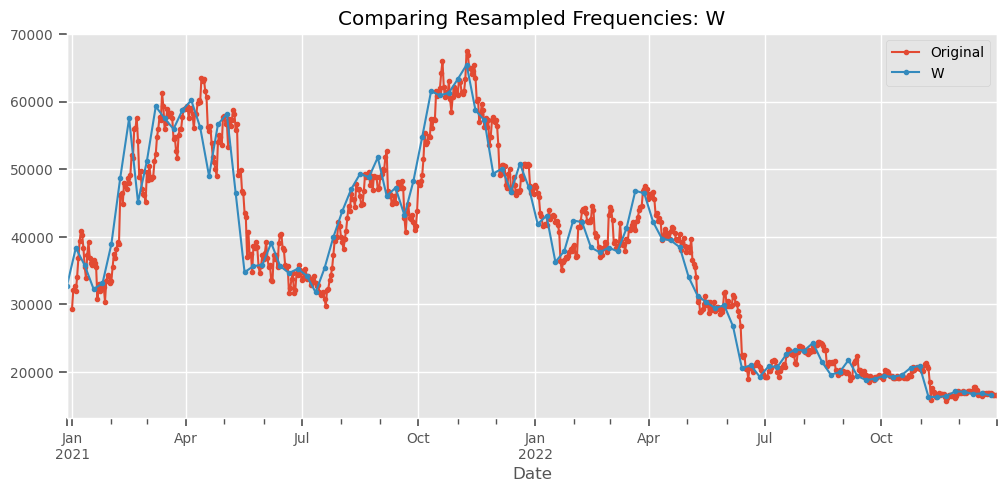

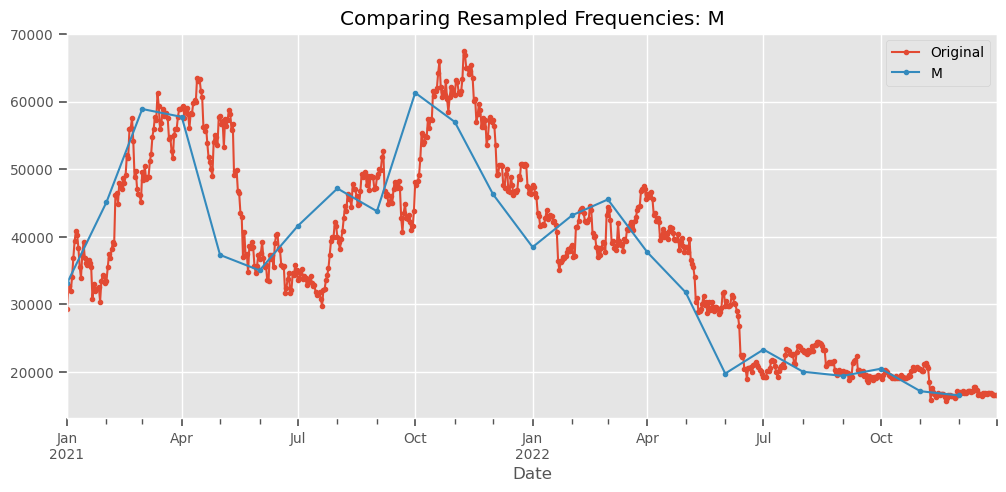

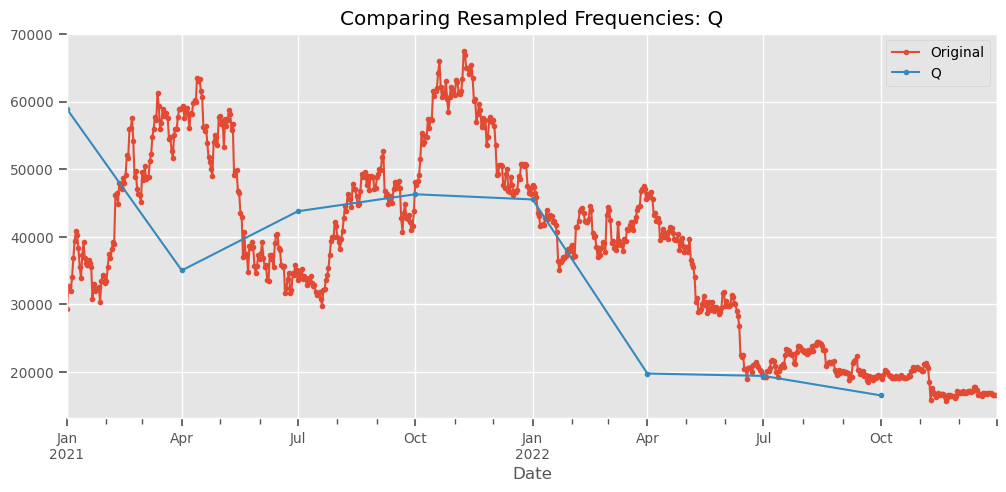

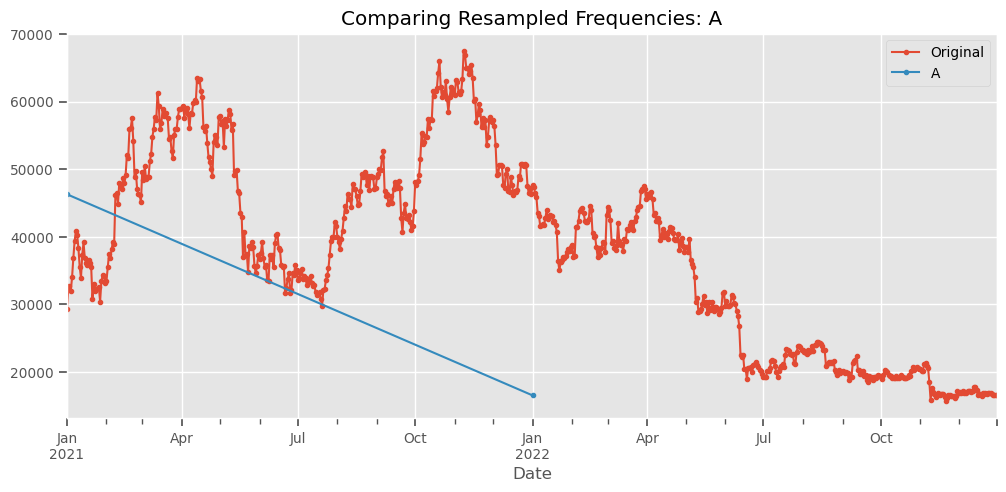

In [75]:
freqs = ['D','W','M','Q','A']


for freq in freqs:
    ax = ts.plot(label='Original',  style='.-',
            title=f'Comparing Resampled Frequencies: {freq}');

    ts_temp = ts.resample(freq).last()
    ts_temp.plot(style='.-', label=freq,ax=ax)
    plt.legend()
    plt.show()

# Save the new processed data

In [ ]:
import os
folder = "Data/FromClass/"
os.makedirs(folder, exist_ok=True)

In [ ]:
df_ts.to_csv(folder + 'SP500-Close-Prices.csv')

In [ ]:
crypto_unstacked.to_csv(folder + 'crypto_currencies.csv')

# Appendix: Using Tick Date Formatters/Locators

- Let's add a minor xtick every 3 months.

In [76]:
import matplotlib.dates as mdates

In [77]:
## CREATE ARTISTS FOR MAJOR XTICKS (Years)
# Create a year locator
loc_major_yr = mdates.YearLocator()
# Create a year formatter using 4-digit years
fmt_major_yr = mdates.DateFormatter("%Y")


## CREATE ARTISTS FOR MINOR XTICKS ( Months)
# Create a month locator that will add months at 1,4,7,10
loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
# Createa monthnformatter that will use 3-letter month names
fmt_minor_3m = mdates.DateFormatter("%b")

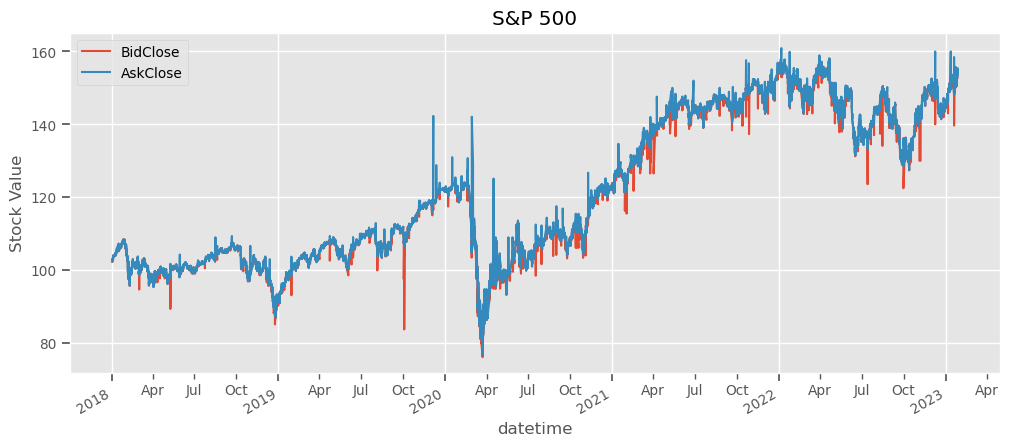

In [78]:
## Create our plot and save the ax
ax = df_ts.plot()
ax.set(ylabel="Stock Value", title='S&P 500')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)

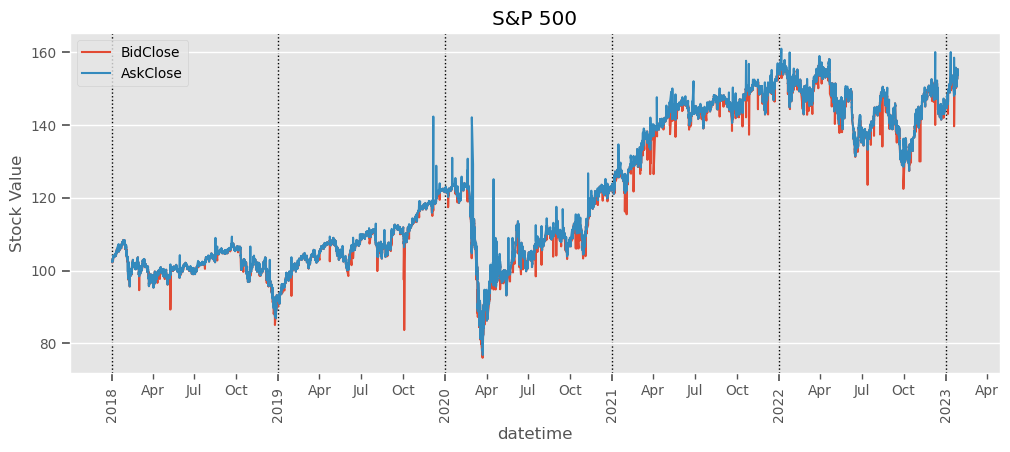

In [79]:
## Create our plot and save the ax
ax = df_ts.plot()
ax.set(ylabel="Stock Value", title='S&P 500')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)





# Add gridlines for major xaxis ticks
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

## Rotate the major tick years using fig.autofmt_xdate
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')

In [80]:
def format_xdates_stocks(ax):
    
    # Create a year locator
    loc_major_yr = mdates.YearLocator()
    # Create a year formatter using 4-digit years
    fmt_major_yr = mdates.DateFormatter("%Y")


    # Create a month locator that will add months at 1,4,7,10
    loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
    # Createa monthnformatter that will use 3-letter month names
    fmt_minor_3m = mdates.DateFormatter("%b")
    

    
    # Set xaxis major locator/formatter
    ax.xaxis.set_major_locator(loc_major_yr)
    ax.xaxis.set_major_formatter(fmt_major_yr)


    # Set xaxis minor locator/formatter
    ax.xaxis.set_minor_locator(loc_minor_3m)
    ax.xaxis.set_minor_formatter(fmt_minor_3m)

    

    # Add gridlines for major xaxis ticks
    ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

    ## Rotate the major tick years using fig.autofmt_xdate
    fig = ax.get_figure()
    fig.autofmt_xdate(which='major', rotation=90,ha='center')
    return fig


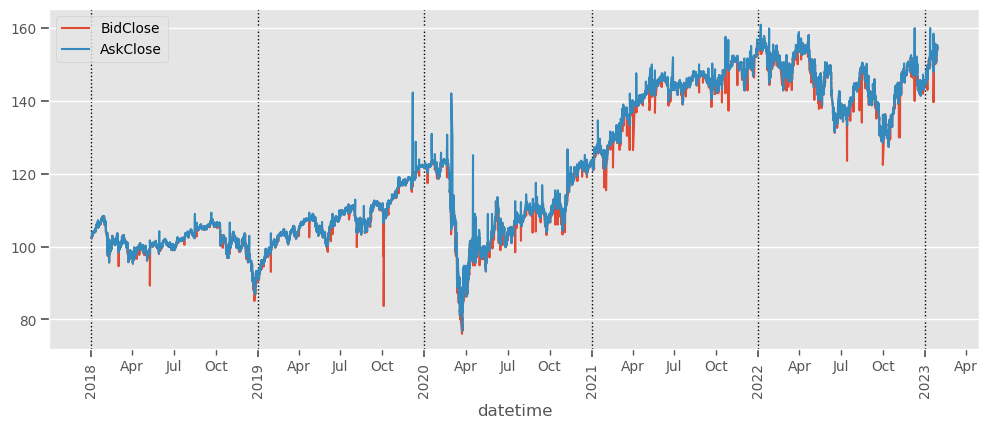

In [81]:
ax = df_ts.plot()
format_xdates_stocks(ax);